In [1]:
#import numpy as np
#import cv2 as cv
#img = cv.imread("InfTUL.bmp",0)
#cv.imshow('temp', img)
#cv.waitKey(0)
#print(img.shape)
#new_img = np.empty([img.shape[0], img.shape[1]])
#print(new_img.shape)
#for i in range(img.shape[0]):
#    for j in range(img.shape[1]):
#        if i == 0 or j == 0:
#            new_img[i, j] = img[i, j]
#        if i == img.shape[0]-1 or j == img.shape[1]-1:
#            new_img[i, j] = img[i, j]
#        if 0 < i < img.shape[0]-1 and 0 < j < img.shape[1]-1:           
#cv.imshow('temp2', new_img)
#cv.waitKey(0)

Morphological operations

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Let img be

In [26]:
#img=cv.imread("infTUL.png",-1)
img=cv.imread("infTUL.png",0)
#0 jako argument, bo nie chcemy miec 3!!!
cv.imshow('temp',img)
cv.waitKey(0)
print(img)
print(img.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(215, 675)


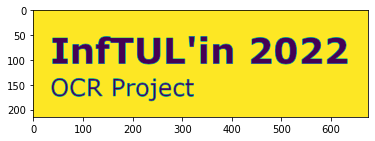

In [92]:
plt.figure()
plt.imshow(img)

In [48]:
print(img.shape)#gdyby nie było 0, to byłoby (215,675,3)

(215, 675)


In [61]:
print(img.shape[0])
print(img.shape[1])

215
675


In [88]:
#array of 0
new_img=np.empty([img.shape[0],img.shape[1]])
#cv.imshow("Blank",new_img) #czarne pole!
#cv.waitKey(0)
print(new_img)
print(new_img.shape)
print(new_img.shape[0])
print(new_img.shape[1])
#plt.figure()
#plt.imshow(new_img)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(215, 675)
215
675


Dilation

In [3]:
def dilate(img):
    local_new_img=np.empty([img.shape[0],img.shape[1]])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            #we've chosen the kernel
            if i==0 or j==0:#gorna i lewa
                local_new_img[i,j]=img[i,j]
            if i==img.shape[0]-1 or j==img.shape[1]-1:#dolna i prawa
                local_new_img[i,j]=img[i,j]
            if 0 <i<img.shape[0]-1 and 0 <j<img.shape[1]-1:
                local_new_img[i,j]=img[i,j]
                for k in (i-1,i+1):
                    for n in (j-1,j+1):
                        if img[k,n]!=255 and k!=i and n!=j:
                            local_new_img[i,j]=0
                if local_new_img[i,j]!=0:
                    local_new_img[i,j]=img[i,j]
    return local_new_img

In [27]:
dilated=dilate(img)
cv.imshow("Dilated",dilated)
cv.imshow('Img',img)
cv.waitKey(0)

Erozja

In [5]:
def erode(img):
    local_new_img=np.empty([img.shape[0],img.shape[1]])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            #we've chosen the kernel
            if i==0 or j==0:#gorna i lewa
                local_new_img[i,j]=img[i,j]
            if i==img.shape[0]-1 or j==img.shape[1]-1:#dolna i prawa
                local_new_img[i,j]=img[i,j]
            if 0 <i<img.shape[0]-1 and 0 <j<img.shape[1]-1:
                for k in range(i-1,i+1):
                    for n in range(j-1,j+1):
                        if img[k,n]==255 and k!=i and n!=j: #and k!=i and n!=j:
                            local_new_img[i,j]=255
                #if local_new_img[i,j]!=255:
                    #local_new_img[i,j]=img[i,j]
    return local_new_img

In [28]:
eroded=erode(img)
cv.imshow("Eroded",eroded)
cv.imshow('Img',img)
cv.waitKey(0)

Comparison

In [32]:
img=cv.imread("infTUL.png",0)
dilated=dilate(img)
eroded=erode(img)

In [ ]:
cv.line(dilated,(0,52),(dilated.shape[1],52),(0),thickness=1)
cv.imshow("Dilated",dilated)
cv.line(eroded,(0,52),(eroded.shape[1],52),(0),thickness=1)
cv.imshow("Eroded",eroded)
cv.line(img,(0,52),(img.shape[1],52),(0),thickness=1)
cv.imshow('Img',img)
cv.waitKey(0)